## Entrega Clasificacion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('max_rows', None)  # para ver todas las filas de un df
sns.set()

Ver el nombre de la carpeta donde descromprimen los archivos!

In [2]:
!ls ../input/bankdscor9

data_test.csv  data_train.csv


In [3]:
# Descomentar las siguientes lineas para leer la descripcion de las columnas
# with open('bankdata/bank-columns-description.txt') as fp:
#     print(fp.read())

In [4]:
df = pd.read_csv('../input/bankdscor9/data_train.csv').reset_index(drop=True)
df.tail(3)

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35006,35006,37,blue-collar,married,basic.6y,unknown,no,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
35007,35007,35,admin.,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,yes
35008,35008,42,services,married,high.school,no,yes,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no


In [5]:
df.shape

(35009, 21)

In [6]:
df_test = pd.read_csv('../input/bankdscor9/data_test.csv').reset_index(drop=True)
df_test.tail(3)

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
6176,6176,35,technician,married,high.school,no,no,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1
6177,6177,32,technician,single,professional.course,no,no,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
6178,6178,32,technician,single,university.degree,no,yes,no,cellular,nov,fri,1,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8


In [7]:
df_test.head(5)

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,48,blue-collar,married,basic.6y,unknown,no,no,cellular,apr,fri,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
1,1,32,admin.,single,high.school,no,yes,no,cellular,jul,fri,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
2,2,49,technician,married,professional.course,unknown,yes,no,cellular,aug,thu,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
3,3,54,admin.,married,university.degree,no,no,no,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
4,4,41,self-employed,married,basic.9y,unknown,no,no,cellular,jul,fri,8,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1


### EDA

In [8]:
print('Columnas nulas:', sum(df.isnull().sum() > 0))
print('Columnas con valores categoricos:', sum([df[col].dtype == 'object' for col in df.columns]))
print('Columnas con valores reales:', sum([df[col].dtype == 'float' for col in df.columns]))
print('Columnas con valores enteras:', sum([df[col].dtype == 'int64' for col in df.columns]))

Columnas nulas: 0
Columnas con valores categoricos: 11
Columnas con valores reales: 5
Columnas con valores enteras: 5


In [9]:
df.y = df.y.map({'no': 0, 'yes': 1})

In [10]:
df.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
df_test.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [12]:
df.describe()

,id,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,35009.000000,35009.000000,35009.000000,35009.000000,35009.000000,35009.000000,35009.000000,35009.000000,35009.000000,35009.000000,35009.000000
mean,17504.000000,40.037819,2.566911,962.295010,0.173955,0.084613,93.574636,-40.481082,3.626096,5167.255417,0.112657
std,10106.372124,10.426932,2.762031,187.360883,0.498473,1.572718,0.579426,4.637274,1.733060,72.171973,0.316177
min,0.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,8752.000000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,17504.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,26256.000000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,35008.000000,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


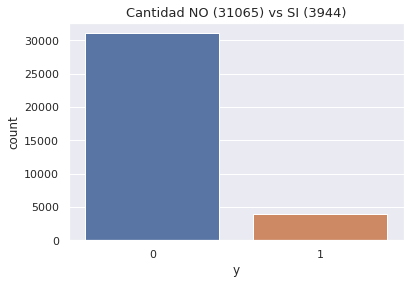

In [13]:
chart = sns.countplot(df.y)
chart.set_title(f'Cantidad NO ({sum(df.y==0)}) vs SI ({sum(df.y==1)})',{'fontsize':13});

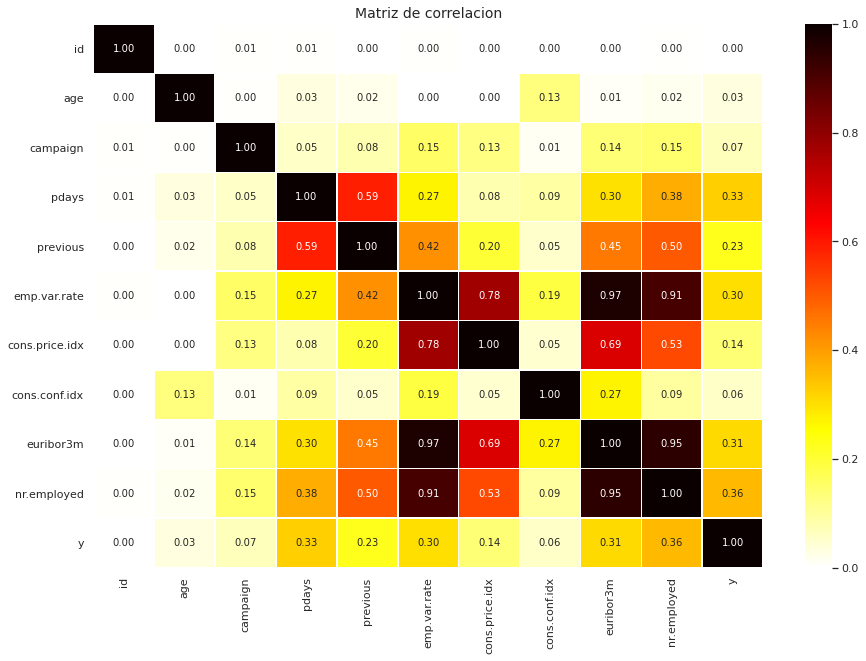

In [14]:
corr = df.corr().abs()  # vemos los valores absolutos para buscar relaciones entre las features
# mask = np.tril(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(15,10))
chart = sns.heatmap(corr, cmap='hot_r', annot=True, fmt= '.2f', linewidths=0.4, vmin=0, vmax=1, annot_kws={'size': 10}) # add "mask=mask," for triangular matrix 
chart.set_title("Matriz de correlacion", {'fontsize':14});

In [15]:
# Esta comentado porque puede tardar un rato
# sns.pairplot(df, hue="y", diag_kind="kde");

Vemos las distribuciones de las features numericas

In [16]:
# for col in df.drop(columns=['y', 'id']).columns.to_list():
#     if df[col].dtype != 'object':
#         print(col, df[col].dtype)
#         plt.figure(figsize=(12,4))
        
#         chart = sns.distplot(df[col], label='Train')
#         chart = sns.distplot(df_test[col], label='Test')
        
#         chart.set_title(f'Distribution of "{col}" feature')
#         plt.legend()
#         plt.show()

Vemos los valores unicos de las features categoricas

In [17]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'- Column "{col}": \n\t{df[col].unique()}', end='\n\n') 

- Column "job": 
	['admin.' 'technician' 'management' 'blue-collar' 'services' 'unemployed'
 'self-employed' 'retired' 'entrepreneur' 'student' 'unknown' 'housemaid']

- Column "marital": 
	['married' 'single' 'divorced' 'unknown']

- Column "education": 
	['university.degree' 'professional.course' 'basic.4y' 'basic.9y'
 'high.school' 'unknown' 'basic.6y' 'illiterate']

- Column "default": 
	['no' 'unknown' 'yes']

- Column "housing": 
	['yes' 'no' 'unknown']

- Column "loan": 
	['no' 'yes' 'unknown']

- Column "contact": 
	['cellular' 'telephone']

- Column "month": 
	['oct' 'aug' 'jul' 'jun' 'may' 'nov' 'apr' 'mar' 'dec' 'sep']

- Column "day_of_week": 
	['wed' 'thu' 'mon' 'tue' 'fri']

- Column "poutcome": 
	['success' 'nonexistent' 'failure']



### Feature engineer

Transformamos las features categoricas en dummies (oneHotEncoder)

In [18]:
for col in df.drop(columns=['y']).columns.to_list():
    if df[col].dtype == 'object':
        df = pd.concat([df.drop(columns=[col]), pd.get_dummies(df[col], prefix=col)], axis=1)

df.tail(5)

,id,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
35004,35004,31,1,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0,0,0,0,1,0,0,0,1,0
35005,35005,37,2,1,1,-1.8,92.893,-46.2,1.270,5099.1,...,0,0,0,0,0,0,1,0,0,1
35006,35006,37,1,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,0,0,0,0,1,0,1,0
35007,35007,35,2,999,0,-0.1,93.200,-42.0,4.120,5195.8,...,0,0,0,0,0,0,1,0,1,0
35008,35008,42,2,999,0,-1.8,92.893,-46.2,1.334,5099.1,...,0,0,0,0,0,0,1,0,1,0


Replicamos lo mismo en el dataset de Test

In [19]:
for col in df_test.columns.to_list():
    if df_test[col].dtype == 'object':
        df_test = pd.concat([df_test.drop(columns=[col]), pd.get_dummies(df_test[col], prefix=col)], axis=1)

df_test.tail(5)

,id,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
6174,6174,43,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,1,0,0,1,0
6175,6175,36,6,999,0,1.4,93.918,-42.7,4.968,5228.1,...,0,0,0,0,1,0,0,0,1,0
6176,6176,35,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,0,0,0,0,1,0,0,1,0
6177,6177,32,1,999,0,1.4,93.918,-42.7,4.968,5228.1,...,0,0,0,0,1,0,0,0,1,0
6178,6178,32,1,999,1,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,1,0,0


Como algunos valores pueden no estar en ambos dataframes nos quedamos con las columnas en comun

In [20]:
# la funcion de set de python nos devuelve un conjunto dada una lista, esto es, un grupo de valores unicos
common_features = list(set(df.columns).intersection(set(df_test.columns)))

df = df[common_features + ['y']]  # dejamos la columna target en el df de entrenamiento y validacion

df_test = df_test[common_features]

In [21]:
df.duplicated().sum()

0

In [22]:
# Borramos los duplicados
# df.drop_duplicates(inplace=True)

### Modelo de prueba

In [23]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, roc_curve, roc_auc_score, f1_score

In [24]:
X = df.drop(columns=['y']).values
y = df.y

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [26]:
tree = DecisionTreeClassifier(max_depth=10)

In [27]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Metricas

In [28]:
f1_score( y_test, tree.predict(X_test) )

0.39068710959682007

In [29]:
print(classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9350
           1       0.57      0.30      0.39      1153

    accuracy                           0.90     10503
   macro avg       0.74      0.64      0.67     10503
weighted avg       0.88      0.90      0.88     10503



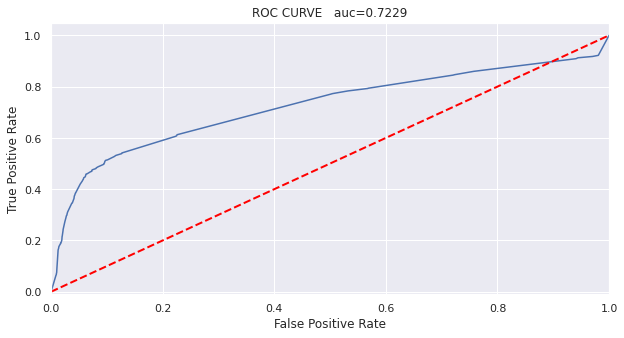

In [30]:
y_pred_proba = tree.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([-0.01, 1.05])
plt.title(f'ROC CURVE   auc={auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Submit

Predecimos sobre el conjunto de Test

In [31]:
y_pred = tree.predict(df_test.values)

Creamos un csv con los resultados de la prediccion para subir en [kaggle](https://www.kaggle.com/c/Banco-PF-DSCOR9)

In [32]:
import pickle 

with open('model1.pkl', 'wb') as fp:
    pickle.dump(tree, fp)

In [33]:
pd.Series(y_pred, name='y').to_csv('sample_submit.csv', index_label='id')

In [34]:
!head -n 20 sample_submit.csv

id,y
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0
10,0
11,0
12,0
13,0
14,0
15,1
16,1
17,0
18,0
